# Multilayer perceptron
Before going to MLP, lets go through some required basics. If you consider linear binary classification problem where we have two features $x_1$, $x_2$ and a binary target (+1 or -1), the decision function, $d(x) = w_0 +w_1 x_1 + w_2 x_2)$ would be a linear combination of the features. 

To predict whether a data point is positive or negative we try to find a separating line represented by $d(x)$ and use it sign, $sign(d(x))$ to tell which side of the line the point falls. However, if $d(x)$ = 0 exactly then the point lies exactly on the separating plane.

<img src="images/linear_binary_classification.jpg" style="width:10%">

With this idea in mind, we can illustrate logistic regression in a similar way. Here it calculates the probability of a point being plus or minus 1. It uses a function called sigmoid for this purpose instead of a sign function. Sigmoid function transforms any value to the range $[0,1]$, to valid probabilities.

$σ(d(x))$,where $σ(x) = 1/1 + exp(-x)$

The distance between the point and the line can be converted into confidence. The farther the point the more confident the model is that it belongs to that class. So, any point that lies on the line, $d(x)=0$ has $\sigma(x)$ as 0.5 meaning it can be either plus or minus and model is not confident.

For a rather complex problem below on the left, we try to divide it into subproblems of 3 logistic regressions represented by lines $z_1$, $z_2$ and $z_3$. The predictions of these lines would be used as new features in our model. In short, we translate every data point from having 2 co-ordinates $(x_1, x_2)$ to 3 co-ordinates $(z_1, z_2, z_3)$. To solve this, we build a linear model on top of these new features:
$(x_1, x_2)$ –> $(z_1, z_2, z_3)$

<img src="images/complex_problem.jpg" style="width:10%">     <img src="images/complex_solution.jpg" style="width:10%">

$z_i = \sigma(w_{0,i} + w_{1,i} x_1 + w_{2,i} x_2)$

$a(x) = \sigma(w_0 + w_1z_1(x) + w_2z_2(x) +w_3z_3(x)$

We then apply 3 linear models to get z1, z2, z3 and then a final one to get our final prediction ‘a’. This composite function could be translated into a computational graph:

<img src="images/computational_graph.jpg" style="width:10%"> 
Nodes are the computed variables $(x_1, x_2, z_1, z_2, z_3, a)$. Edges correspond to dependencies. Meaning, we need $x_1$ and $x_2$ to compute $z_1$ or $z_2$ or $z_3$ and these in turn to compute a. This computational graph is a **multilayer perceptron**. 

It is the simplest artificial neural network. It has 3 basic layers: Input layer of input features $x_1, x_2$; first hidden layer of $z_1, z_2, z_3$, also called as dense layer or fully connected layer; and output layer of prediction ‘a’.  Each node is called a neuron. A neuron is something that takes a linear combination of inputs and applies some non-linear activation function such as sigmoid activation. 

Let us look at how we arrived with the terms, artificial neurons.

A neuron in our brain is some complex cell that get signals from other cells similar to it and based on some difficult logic inside of that cell it decides to output a signal or not which is then transmitted to other neurons like it.
<img src="images/artificial_neuron.jpg" style="width:10%"> 

We try to approximate this process with a mathematical neuron i.e, an artificial neuron using logistic regression. Suppose we have $x_1$ and $x_2$ as inputs and multiply by the weights and compute the sum. We apply sigmoid function which is a smooth indicator approximation. It that decides whether to output a signal or not based on if it is positive or not. We smooth the indicator so that our problem becomes differentiable. It is called activation function since it activates the neuron when a certain sum is computed. Here the artificial neuron is correlation activated since when the input has some pattern similar to what it is trying to find then it has a huge activation in the output. We need the non-linear activation function otherwise any algorithm could just be a fancy linear function that is no better than a linear model and we cannot solve complex problems with them.

The number of layers, neurons in each layer and the activation function constitute an architecture of MLP. These are also hyperparameters that we need to choose in order to define an architecture.

To train an MLP we can use stochastic gradient descent(SGD) since each neuron which is a linear combination of inputs is differentiable and the activation function is also differentiable. This just turns out to be a complex function that is still differentiable, and we can use SGD. One possible problem could be that we can may have lot of local optimums and have a sub-optimal solution in which case the best decision would be to start from some other point that could lead to global optimum.

Regarding training an MLP we need to be able to 1) automatically calculate the gradients since they would be many hidden layers 2) We need to calculate them fast since we would have many neurons.

To calculate the gradients automatically, we use chain rule:

For a composite function:
$z_1=z_1(x_1, x_2)$, $z_2=z_2(x_1, x_2)$, $p=p(z_1, z_2)$ where $z_1, z_2, z_3, p$ are differentiable. As per chain rule:

$\frac{∂p}{∂x1}=\frac{∂p}{∂z1} \frac{∂z1}{∂x1}+ \frac{∂p}{∂z2} \frac{∂z2}{∂x1}$

If we construct a new graph of derivatives it will be the same as computational graph with one distinction. The edges will change their direction with each edge assigned to a derivative.  <img src="images/graph_of_derivatives.jpg" style="width:10%"> 

If we take a deeper network, then to get $\frac{∂p}{∂x1}$ we apply chain rule recursively since the derivatives along the way are also composite functions. **Each term in our derivative that we have computed actually corresponds to some path going from p to x1**. <img src="images/deeper_comp_network.jpg" style="width:10%"> 

$\frac{∂p}{∂x1}=\frac{∂p}{∂h1} \frac{∂h1}{∂z1} \frac{∂z1}{∂x1}+ \frac{∂p}{∂h1} \frac{∂h1}{∂z2} \frac{∂z2}{∂x1}+ \frac{∂p}{∂h2} \frac{∂h2}{∂z1} \frac{∂z1}{∂x1}+ \frac{∂p}{∂h2} \frac{∂h2}{∂z2} \frac{∂z2}{∂x1}$

Therefore, using chain rule and computational graph, we compute derivatives of composite functions **automatically**.

Next we need to be able to apply chain rule **efficiently** to compute the derivatives faster since they could be billions of parameters. In the final step, in order to calculate derivative of prediction with respect to the first node, we have to go through the intermediate nodes anyway. So, a lot of derivatives would be reused while calculating derivative of prediction with respect to some other node. Therefore, we can store these derivatives of deepest layers like $\frac{∂p}{∂h1}$ in the above network , skip unnecessary computations and use previous ones by substituting wherever necessary. This is called reverse-mode differentiation or in neural networks as back propagation. It works fast as we compute value of each edge only once when we go along it, store it and reuse it later. 

There are 2 kinds of passes in back propagation:
Forward pass: Made in original computational graph. We need forward pass in order to find the point at which we need to calculate the derivative during backward pass. 
Backward pass: made in graph of derivatives.
To implement a sigmoid activation and backpropagation we need to implement forward pass and backward pass. For forward pass we take all our inputs and apply sigmoid activation function with numpy. But backward pass is a little more complex. It is made on graph of derivatives. We should tell how the derivative changes when we go through the sigmoid node in the opposite direction. It will take input at which we would be taking our derivative and also an incoming gradient, calculate the sigmoid function of input and multiply the derivative of sigmoid function with the incoming gradient. So by chain rule during backward pass the product accumulates automatically along the path.

For MLP implementation we treat a dense layer as matrix multiplication. Matrix multiplication with numpy is much faster than python loops. We can do matrix multiplication efficiently on GPU.

Forward pass for dense layer would be taking the inputs and their weights and doing a matrix multiplication of them both:
$XW = Z$

``` python
def forward_pass(X,W):
    return X.dot(W)
```
Backward pass takes an additional incoming gradient to calculate dx and dw efficiently. We multiply incoming gradient by W transpose or X transpose to get dX or dW respectively.
$\frac{∂L_b}{∂X} = \frac{∂L}{∂Z} W^T, \frac{∂L_b}{∂W} = X^T \frac{∂L}{∂Z} $
``` python
def backward_pass(X,W, dZ):
    dX = dZ.dot(W.T)
    dW = X.T.dot(dZ)
    return dX,dW
```
One reason why we follow the approach of using ∂L/∂Z in backward pass interface is to calculate dX and dW efficiently, otherwise we need to compute ∂Z/∂X or ∂Z/∂W which is complicated as it a matrix derivative with respect to another matrix. Therefore, we have incoming gradient in backward pass to skip unnecessary tensor computations.

**Tensorflow** is a tool to describe computational graphs. The foundation of computation in TF is a graph object with a network of nodes each representing one operation, connected to each other as inputs and outputs. TF is also a runtime for execution of these graphs. We can execute them in CPU, GPU or in one node or distributed mode environment.  
Input as well as output to these networks would be a collection of tensors (multi-dimensional arrays). Therefore, we have a graph of operations that transforms tensors into another tensor so its basically a flow of tensors. Hence called tensor flow.  
Input can be of 3 types:  
Placeholder: Placeholder for a tensor which will be fed during graph execution  
Variable: tensor with some value that is stored and updated during execution like weight matrix in MLP  
Constant: tensor with a value that cannot be changed  
Tensorflow creates a default graph when imported. All operations go there by default. We can access it by tf.get_default_graph() which returns an instance of tf.graph().  
To clear it we use tf.reset_default_graph.  
To get the operations we used tf.get_default_graph().get_operations().  
To get output of a particular operation tf.get_default_graph().get_operations().outputs  
We define a graph in Python but the operations are written in C++ and executed on either CPU or a GPU or a tensor processing unit because python is very slow. However the graph can be executed in the recent versions of tf using eager execution mode. 
## Runnning a graph
A tf.session object encapsulates the environment in which tf.operation objects are executed and tf.tensor objects are evaluated
```python
#creating a session object
s=tf.interactivesession() 
#define a graph
a = tf.constant(5.0) 
b = tf.constant(6.0)
c=a*b 
#run session 
s.run(c)
```
A session object owns necessary resources like variable objects to execute the graph and runs it on CPU, GPU, etc. It is important to release these resources at the end when they are no longer required with *tf.Session.close()*. One thing to note about variable is that we execute the variable in different environment like on GPU for example. So we need to initialize its value on GPU and for that we need to run some code to get initial value to the graph execution environment using *tf.global_variables_initializer()*.  
## Training a model with tensorflow
There are optimizers in tensors to do back propagation automatically. We don’t have to specify all the optimized variables. Tensorflow knows the graph and which variables are needed to compute the function, so we do not need to specify variables that help in minimization. However, if we do not want a specific variable to be trained we explicitly need to mention in the argument *trainable*.  
To get all trainable variables - tf.trainable_variables().  
Tensorboard is a visual tool to log, see plots of loss function or any other statistics. To do this we add summaries.  
Tensorflow allows to checkpoint your graph but only the variable values are stored and we need to define the graph exactly the same way we did before restoring a checkpoint.  
Tf.train.saver(tf.trainable_variables()).save to save variables’ state  
Tf.train.saver(tf.trainable_variables()).last_checkpoints to list last checkpoints  
Tf.train.saver(tf.trainable_variables()).restore a previous checkpoint  






# MNIST digits classification with TensorFlow

<img src="images/mnist_sample.png" style="width:5%">

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
print("We're using TF", tf.__version__)

We're using TF 1.2.1


In [3]:
import sys
sys.path.append("../..")

import matplotlib_utils
from importlib import reload
reload(matplotlib_utils)

import keras_utils
from keras_utils import reset_tf_session

Using TensorFlow backend.


#### Looking at the data

In this task we have 50000 28x28 images of digits from 0 to 9.
We will train a classifier on this data.

In [4]:
import preprocessed_mnist
# loading the train validation and test datasets
X_train, y_train, X_val, y_val, X_test, y_test = preprocessed_mnist.load_dataset_from_file()

X_train [shape (50000, 28, 28)] sample patch:
 [[ 0.          0.29803922  0.96470588  0.98823529  0.43921569]
 [ 0.          0.33333333  0.98823529  0.90196078  0.09803922]
 [ 0.          0.33333333  0.98823529  0.8745098   0.        ]
 [ 0.          0.33333333  0.98823529  0.56862745  0.        ]
 [ 0.          0.3372549   0.99215686  0.88235294  0.        ]]
A closeup of a sample patch:


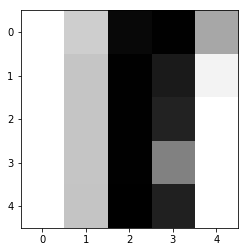

And the whole sample:


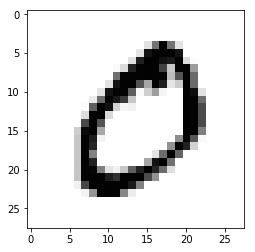

y_train [shape (50000,)] 10 samples:
 [5 0 4 1 9 2 1 3 1 4]


In [6]:
# X contains rgb values divided by 255 (there are 0 to 255 different color intensities and we wish to normalise these values)
print("X_train [shape %s] sample patch:\n" % (str(X_train.shape)), X_train[1, 15:20, 5:10])
print("A closeup of a sample patch:")
plt.imshow(X_train[1, 15:20, 5:10], cmap="Greys")
plt.show()
print("And the whole sample:")
plt.imshow(X_train[1], cmap="Greys")
plt.show()
print("y_train [shape %s] 10 samples:\n" % (str(y_train.shape)), y_train[:10])

# Linear model

The task is to train a linear classifier $\vec{x} \rightarrow y$ with SGD using TensorFlow.

We calculate a logit (a linear transformation) $z_k$ for each class: 
$$z_k = \vec{x} \cdot \vec{w_k} + b_k \quad k = 0..9$$

And transform logits $z_k$ to valid probabilities $p_k$ with softmax: 
$$p_k = \frac{e^{z_k}}{\sum_{i=0}^{9}{e^{z_i}}} \quad k = 0..9$$

We will use a cross-entropy loss to train our multi-class classifier:
$$\text{cross-entropy}(y, p) = -\sum_{k=0}^{9}{\log(p_k)[y = k]}$$ 

where 
$$
[x]=\begin{cases}
       1, \quad \text{if $x$ is true} \\
       0, \quad \text{otherwise}
    \end{cases}
$$

Cross-entropy minimization pushes $p_k$ close to 1 when $y = k$, which is what we want.

Following are the steps:
* Flatten the images (28x28 -> 784) with `X_train.reshape((X_train.shape[0], -1))` to simplify our linear model implementation
* Use a matrix placeholder for flattened `X_train`
* Convert `y_train` to one-hot encoded vectors that are needed for cross-entropy
* Use a shared variable `W` for all weights (a column $\vec{w_k}$ per class) and `b` for all biases.
* Calculate validation accuracy

In [5]:
X_train_flat = X_train.reshape((X_train.shape[0], -1)) 
print(X_train_flat.shape)

X_val_flat = X_val.reshape((X_val.shape[0], -1))
print(X_val_flat.shape)

(50000, 784)
(10000, 784)


In [6]:
import keras
#perform one-hot encoding
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)

print(y_train_oh.shape)
print(y_train_oh[:3], y_train[:3])

(50000, 10)
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]] [5 0 4]


In [7]:
# run this again if you remake your graph
s = tf.Session()

In [10]:
# Model parameters: W and b
W = tf.get_variable(name="weights", shape = [784,10]) # shape[0] should match with the number of features (784)
b = tf.get_variable(name="biases", shape = [10])

In [10]:
# Placeholders for the input data
input_X =  tf.placeholder(dtype="float32",shape = [None,784]) # tf.placeholder(...) for flat X with shape[0] = None for any batch size
input_y =  tf.placeholder(dtype="float32",shape = [None,10]) # tf.placeholder(...) for one-hot encoded true labels

In [27]:
# Compute predictions
logits = tf.matmul(input_X,W) + b # logits for input_X, resulting shape should be [input_X.shape[0], 10]
probas = tf.nn.softmax(logits) # apply softmax to logits
classes = tf.argmax(probas,axis=1) # apply tf.argmax to find a class index with highest probability
# Loss should be a scalar number: average loss over all the objects with tf.reduce_mean().
# Use tf.nn.softmax_cross_entropy_with_logits on top of one-hot encoded input_y and logits.
# It is identical to calculating cross-entropy on top of probas, but is more numerically friendly.
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=input_y))# cross-entropy loss

# Use a default tf.train.AdamOptimizer to get an SGD step
step = tf.train.AdamOptimizer(0.001).minimize(loss) # optimizer step that minimizes the loss


In [31]:
s.run(tf.global_variables_initializer())

BATCH_SIZE = 512
EPOCHS = 40

for epoch in range(EPOCHS):  # we finish an epoch when we've looked at all training samples
    
    batch_losses = []
    for batch_start in range(0, X_train_flat.shape[0], BATCH_SIZE):  #512 images/records per loop until 50000 images
        _, batch_loss = s.run([step, loss], {input_X: X_train_flat[batch_start:batch_start+BATCH_SIZE], 
                                             input_y: y_train_oh[batch_start:batch_start+BATCH_SIZE]})     
        batch_losses.append(batch_loss) # cross entropy loss is accumulated for every batch size 
    train_loss = tf.reduce_mean(batch_losses) 
    val_loss = s.run(loss, {input_X: X_val_flat, input_y: y_val_oh})  # loss minimises every epoch as the w's change to optimize loss
    train_accuracy = accuracy_score(y_train, s.run(classes, {input_X: X_train_flat})) #mismatches between y_train 
                                                                                      #and class with highest probability from predictions
    print(logits.shape,probas.shape,classes.shape)
    valid_accuracy = accuracy_score(y_val, s.run(classes, {input_X: X_val_flat})) #similarly for validation classes and their prediction
    print(train_accuracy, valid_accuracy)

(?, 10) (?, 10) (?,)
0.83564 0.8572
(?, 10) (?, 10) (?,)
0.87176 0.8869
(?, 10) (?, 10) (?,)
0.88606 0.8973
(?, 10) (?, 10) (?,)
0.8944 0.9058
(?, 10) (?, 10) (?,)
0.90002 0.9101
(?, 10) (?, 10) (?,)
0.90454 0.9129
(?, 10) (?, 10) (?,)
0.90772 0.9155
(?, 10) (?, 10) (?,)
0.9104 0.9173
(?, 10) (?, 10) (?,)
0.91244 0.918
(?, 10) (?, 10) (?,)
0.9144 0.9198
(?, 10) (?, 10) (?,)
0.91572 0.9214
(?, 10) (?, 10) (?,)
0.91694 0.9218
(?, 10) (?, 10) (?,)
0.91788 0.9225
(?, 10) (?, 10) (?,)
0.91884 0.9232
(?, 10) (?, 10) (?,)
0.91936 0.9235
(?, 10) (?, 10) (?,)
0.92042 0.9239
(?, 10) (?, 10) (?,)
0.9211 0.9239
(?, 10) (?, 10) (?,)
0.92184 0.9243
(?, 10) (?, 10) (?,)
0.92244 0.9255
(?, 10) (?, 10) (?,)
0.92286 0.9259
(?, 10) (?, 10) (?,)
0.92336 0.9261
(?, 10) (?, 10) (?,)
0.92392 0.9263
(?, 10) (?, 10) (?,)
0.92432 0.927
(?, 10) (?, 10) (?,)
0.92486 0.927
(?, 10) (?, 10) (?,)
0.92544 0.9273
(?, 10) (?, 10) (?,)
0.92598 0.9277
(?, 10) (?, 10) (?,)
0.9264 0.9276
(?, 10) (?, 10) (?,)
0.92678 0.9279


# MLP with hidden layers

Previously we've coded a dense layer with matrix multiplication by hand. 
But this is not convenient, you have to create a lot of variables and your code becomes a mess. 
In TensorFlow there's an easier way to make a dense layer:
```python
hidden1 = tf.layers.dense(inputs, 256, activation=tf.nn.sigmoid)
```
That will create all the necessary variables automatically.  
Here we can also choose an activation function (which we need it for a hidden layer).  
Here we define the MLP with 2 hidden layers and restart training with the cell above.  
You're aiming for higher validation accuracy (~0.97)  here.

In [11]:
hidden1 = tf.layers.dense(input_X, 256, activation=tf.nn.sigmoid)
hidden2 = tf.layers.dense(hidden1, 256, activation=tf.nn.sigmoid)
logits = tf.layers.dense(hidden2,input_y.shape[1])

probas = tf.nn.softmax(logits) 
classes = tf.argmax(probas,axis=1) # apply tf.argmax to find a class index with highest probability
# Loss should be a scalar number: average loss over all the objects with tf.reduce_mean().
# Use tf.nn.softmax_cross_entropy_with_logits on top of one-hot encoded input_y and logits.
# It is identical to calculating cross-entropy on top of probas, but is more numerically friendly (read the docs).
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=input_y))# cross-entropy loss

# Use a default tf.train.AdamOptimizer to get an SGD step
step = tf.train.AdamOptimizer(0.001).minimize(loss) #optimizer step that minimizes the loss

In [33]:
s.run(tf.global_variables_initializer())

BATCH_SIZE = 512
EPOCHS = 40

for epoch in range(EPOCHS):  # we finish an epoch when we've looked at all training samples
    
    batch_losses = []
    for batch_start in range(0, X_train_flat.shape[0], BATCH_SIZE): #512 images/records per loop until 50000 images
        _, batch_loss = s.run([step, loss], {input_X: X_train_flat[batch_start:batch_start+BATCH_SIZE], 
                                             input_y: y_train_oh[batch_start:batch_start+BATCH_SIZE]})
        batch_losses.append(batch_loss) # cross entropy loss is accumulated for every batch size 
    train_loss = tf.reduce_mean(batch_losses)
    val_loss = s.run(loss, {input_X: X_val_flat, input_y: y_val_oh})  # loss minimises every epoch as the w's change to optimize loss
    train_accuracy = accuracy_score(y_train, s.run(classes, {input_X: X_train_flat}))  #mismatches between y_train 
                                                                                       #and class with highest probability from predictions
    valid_accuracy = accuracy_score(y_val, s.run(classes, {input_X: X_val_flat})) #similarly for validation classes and their prediction
    print(train_accuracy, valid_accuracy)

0.871 0.8854
0.90756 0.9146
0.92026 0.927
0.93046 0.9333
0.93764 0.9408
0.94374 0.946
0.94908 0.9496
0.95366 0.9542
0.95782 0.9569
0.9613 0.9605
0.96506 0.9617
0.96828 0.9637
0.97112 0.9651
0.9739 0.9666
0.97654 0.9681
0.97826 0.9692
0.97994 0.9699
0.98168 0.9714
0.9833 0.972
0.98474 0.9721
0.98594 0.9725
0.98706 0.9735
0.98812 0.9739
0.98924 0.9745
0.99018 0.9747
0.99108 0.9759
0.992 0.9761
0.99274 0.9768
0.99322 0.9772
0.99384 0.9771
0.99426 0.977
0.99466 0.9771
0.99498 0.9775
0.99552 0.9776
0.99614 0.9779
0.99674 0.9779
0.9974 0.9781
0.99782 0.9786
0.99826 0.9783
0.99836 0.9779
